# Welcome to the Feature Selection and Extraction Tutorial! 🌟

Author: Alejandro Guerrero-López

## Introduction
Welcome to this interactive tutorial on **Feature Selection and Extraction** using scikit-learn! 

### What is Feature Selection?
Feature selection is a process of selecting a subset of relevant features (variables, predictors) for use in model construction. It simplifies models, improves speed, and prevents overfitting.

### What is Feature Extraction?
Feature extraction transforms data from a high-dimensional space to a lower-dimensional space. An example is reducing the dimensionality of features while retaining most of the information.

### Importance in Machine Learning
Both techniques are crucial for:
- Enhancing the performance of machine learning models.
- Reducing computational complexity.
- Improving model interpretability.

Let's dive in and explore these concepts with practical examples!

# Read the dataset about Clostridioide difficile MALDI-TOFs

In [3]:
import pickle
import numpy as np

# Display an informative message about the process
print("🔍 Loading data for MALDI (Matrix-Assisted Laser Desorption/Ionization) analysis...")

# Paths to the training and testing dataset files
maldi_train_path = "data/df_train_exp2.pkl"
maldi_test_path = "data/df_test_exp2.pkl"

# Load the training data
with open(maldi_train_path, "rb") as handle:
    data_train = pickle.load(handle)
print("Training data loaded successfully!")

# Load the testing data
with open(maldi_test_path, "rb") as handle:
    data_test = pickle.load(handle)
print("Testing data loaded successfully!")

# Extracting intensity data and scaling (multiplying by 1e4)
# This is done to adjust the values for better processing or visualization
x_train = np.array([a[:18000] for a in data_train["intensity"].values]) * 1e4
x_test = np.array([a[:18000] for a in data_test["intensity"].values]) * 1e4
print("Intensity data extracted and scaled.")

# Extracting labels for training and testing sets
y_train = data_train["label"].values
y_test = data_test["label"].values
print("Labels extracted.")

# Extracting IDs from the test set for future reference
id_test = data_test["id"].values

# Creating a copy of original labels for later use
y_test_original = y_test.copy()

# Extracting mass-to-charge (m/z) ratio data
# This represents the masses in the samples
x_train_masses = np.array([a[:18000] for a in data_train["mz"].values])
x_test_masses = np.array([a[:18000] for a in data_test["mz"].values])
print("Mass-to-charge ratio data extracted.")

# Convert the labels to numerical format for analysis
# Assigning: "027" -> 0, "181" -> 1, others -> 2
y_train = np.array([0 if a == "027" else 1 if a == "181" else 2 for a in y_train])
y_test = np.array([0 if a == "027" else 1 if a == "181" else 2 for a in y_test])
print("Labels converted to numerical format.")



print("Data preparation complete! Ready for the next step.")

🔍 Loading data for MALDI (Matrix-Assisted Laser Desorption/Ionization) analysis...


ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'

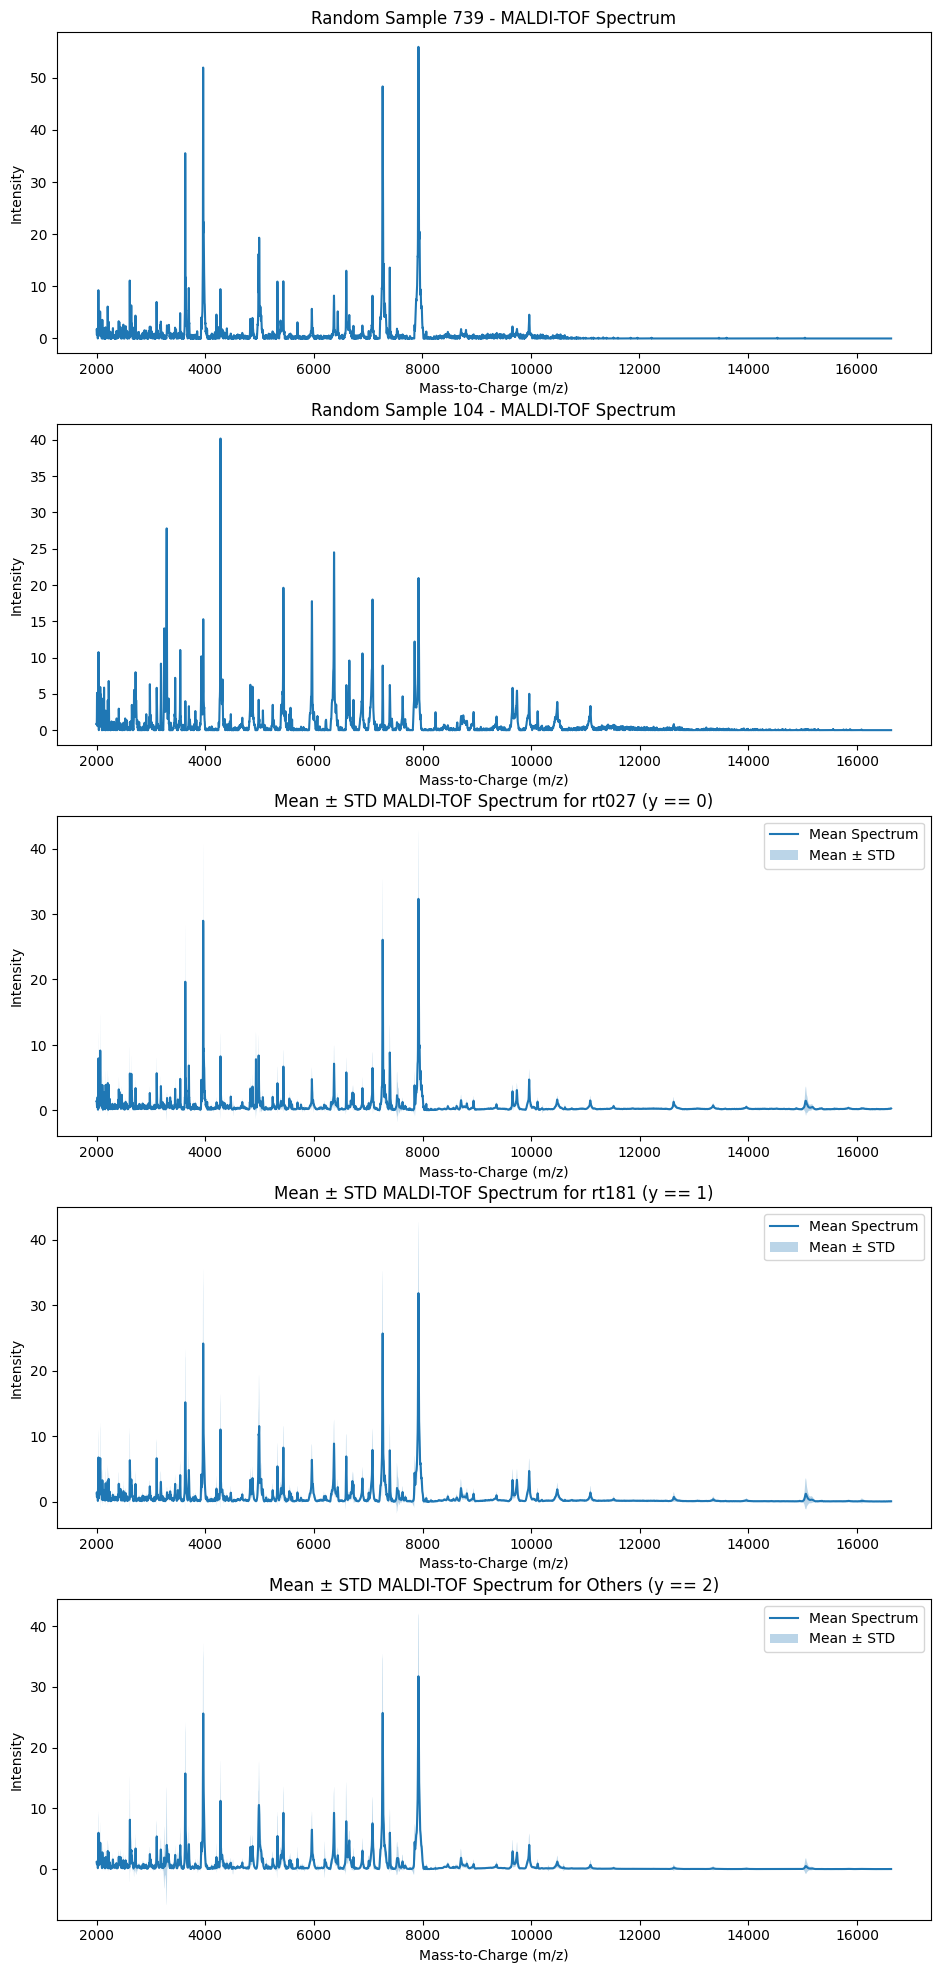

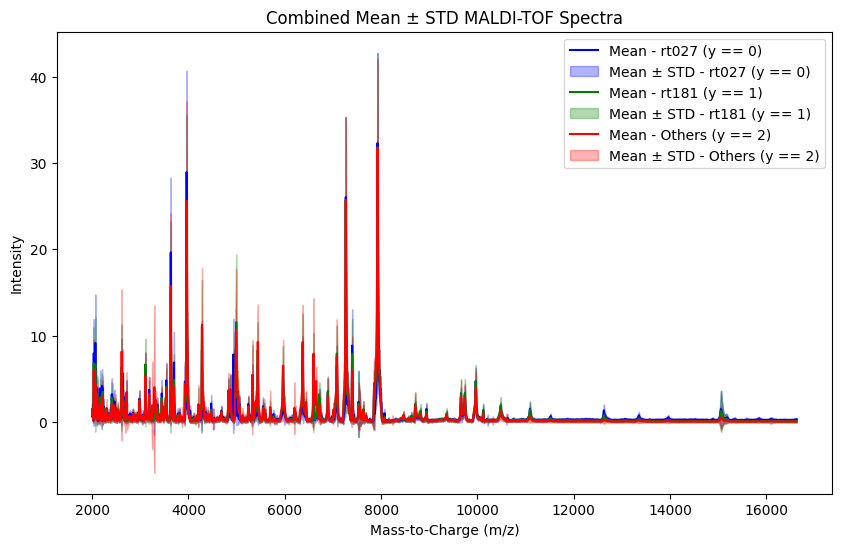

In [3]:
import matplotlib.pyplot as plt


def plot_maldi_tofs(x_masses, x_intensities, y_labels):
    """
    Plots random and mean±std MALDI-TOF spectra for different labels.

    Parameters:
    x_masses (numpy.ndarray): Array of mass-to-charge ratios.
    x_intensities (numpy.ndarray): Array of intensity values.
    y_labels (numpy.ndarray): Array of labels.
    """
    # Creating subplots
    fig, axes = plt.subplots(5, 1, figsize=(10, 20))

    # Adjust layout
    plt.tight_layout(pad=3.0)

    # Plotting two random MALDI-TOF spectra
    random_indices = np.random.choice(len(x_masses), 2, replace=False)
    for i, idx in enumerate(random_indices):
        axes[i].plot(x_masses[idx], x_intensities[idx])
        axes[i].set_title(f"Random Sample {idx} - MALDI-TOF Spectrum")
        axes[i].set_xlabel("Mass-to-Charge (m/z)")
        axes[i].set_ylabel("Intensity")

    # Function to plot mean ± std spectrum
    def plot_mean_std_spectrum(label, label_value, axis_idx, title):
        indices = np.where(y_labels == label_value)[0]
        mean_spectrum = np.mean(x_intensities[indices], axis=0)
        std_spectrum = np.std(x_intensities[indices], axis=0)

        axes[axis_idx].plot(x_masses[0], mean_spectrum, label="Mean Spectrum")
        axes[axis_idx].fill_between(
            x_masses[0],
            mean_spectrum - std_spectrum,
            mean_spectrum + std_spectrum,
            alpha=0.3,
            label="Mean ± STD",
        )
        axes[axis_idx].set_title(title)
        axes[axis_idx].set_xlabel("Mass-to-Charge (m/z)")
        axes[axis_idx].set_ylabel("Intensity")
        axes[axis_idx].legend()

    # Plotting mean ± std spectra for each label
    plot_mean_std_spectrum(
        y_labels, 0, 2, "Mean ± STD MALDI-TOF Spectrum for rt027 (y == 0)"
    )
    plot_mean_std_spectrum(
        y_labels, 1, 3, "Mean ± STD MALDI-TOF Spectrum for rt181 (y == 1)"
    )
    plot_mean_std_spectrum(
        y_labels, 2, 4, "Mean ± STD MALDI-TOF Spectrum for Others (y == 2)"
    )

    plt.show()


# Call the function with the data
plot_maldi_tofs(x_train_masses, x_train, y_train)


def plot_combined_maldi_tofs(x_masses, x_intensities, y_labels):
    """
    Plots mean±std MALDI-TOF spectra for different labels on the same figure.

    Parameters:
    x_masses (numpy.ndarray): Array of mass-to-charge ratios.
    x_intensities (numpy.ndarray): Array of intensity values.
    y_labels (numpy.ndarray): Array of labels.
    """
    plt.figure(figsize=(10, 6))

    # Function to plot mean ± std spectrum
    def plot_mean_std_spectrum(label, label_value, color, label_name):
        indices = np.where(y_labels == label_value)[0]
        mean_spectrum = np.mean(x_intensities[indices], axis=0)
        std_spectrum = np.std(x_intensities[indices], axis=0)

        plt.plot(x_masses[0], mean_spectrum, color=color, label=f"Mean - {label_name}")
        plt.fill_between(
            x_masses[0],
            mean_spectrum - std_spectrum,
            mean_spectrum + std_spectrum,
            color=color,
            alpha=0.3,
            label=f"Mean ± STD - {label_name}",
        )

    # Plotting mean ± std spectra for each label
    plot_mean_std_spectrum(y_labels, 0, "blue", "rt027 (y == 0)")
    plot_mean_std_spectrum(y_labels, 1, "green", "rt181 (y == 1)")
    plot_mean_std_spectrum(y_labels, 2, "red", "Others (y == 2)")

    plt.title("Combined Mean ± STD MALDI-TOF Spectra")
    plt.xlabel("Mass-to-Charge (m/z)")
    plt.ylabel("Intensity")
    plt.legend()
    plt.show()


# Call the function with the data
plot_combined_maldi_tofs(x_train_masses, x_train, y_train)

# Understanding LASSO and HSIC-LASSO

## LASSO (Least Absolute Shrinkage and Selection Operator)

### Overview

LASSO is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. It was originally introduced in the field of statistics but has gained popularity in machine learning for its effectiveness in dealing with high-dimensional data.

### How LASSO Works

LASSO adds a penalty equivalent to the absolute value of the magnitude of coefficients to the loss function. This penalty term encourages the coefficients to shrink towards zero, which leads to sparsity. In other words, some coefficients can become exactly zero, which is equivalent to the particular feature being excluded from the model. This property makes LASSO particularly useful for feature selection in high-dimensional datasets.

### Applications

LASSO is widely used in fields where feature selection is crucial, such as bioinformatics, computational biology, and many areas of science and engineering dealing with high-dimensional data.



In [7]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Using LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=0, max_iter=1000, n_jobs=-1).fit(x_train, y_train)

# Getting the selected features based on the coefficients
selected_features_lasso = np.where(lasso.coef_ != 0)[0]

print(f"Number of features selected by LASSO: {len(selected_features_lasso)}")
print(f"Selected features: {selected_features_lasso}")

Path: 021 out of 100
Path: 018 out of 100
Path: 022 out of 100
Path: 020 out of 100
Path: 023 out of 100
Path: 019 out of 100
Path: 024 out of 100
Path: 020 out of 100
Path: 022 out of 100
Path: 025 out of 100
Path: 021 out of 100
Path: 009 out of 100
Path: 021 out of 100
Path: 026 out of 100
Path: 022 out of 100
Path: 023 out of 100
Path: 027 out of 100
Path: 028 out of 100
Path: 010 out of 100
Path: 024 out of 100
Path: 029 out of 100
Path: 030 out of 100
Path: 022 out of 100
Path: 025 out of 100
Path: 026 out of 100
Path: 023 out of 100
Path: 027 out of 100
Path: 011 out of 100
Path: 028 out of 100
Path: 029 out of 100
Path: 023 out of 100
Path: 030 out of 100
Path: 031 out of 100
Path: 024 out of 100
Path: 012 out of 100
Path: 032 out of 100
Path: 025 out of 100
Path: 013 out of 100
Path: 026 out of 100
Path: 033 out of 100
Path: 024 out of 100
Path: 014 out of 100
Path: 027 out of 100
Path: 031 out of 100
Path: 034 out of 100
Path: 025 out of 100
Path: 035 out of 100
Path: 032 out

/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 064 out of 100
Path: 075 out of 100
Path: 074 out of 100
Path: 056 out of 100
Path: 067 out of 100
Path: 065 out of 100
Path: 068 out of 100
Path: 057 out of 100
Path: 066 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.815e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 076 out of 100
Path: 067 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 075 out of 100
Path: 069 out of 100
Path: 068 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.941e-02, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 077 out of 100
Path: 069 out of 100
Path: 058 out of 100
Path: 070 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 070 out of 100
Path: 059 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 076 out of 100
Path: 060 out of 100
Path: 071 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 061 out of 100
Path: 062 out of 100
Path: 078 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 063 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.706e-02, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 071 out of 100
Path: 064 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.006e-02, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 072 out of 100
Path: 065 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.528e-02, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 077 out of 100
Path: 079 out of 100
Path: 066 out of 100
Path: 073 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 078 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.455e-02, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 072 out of 100
Path: 080 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 074 out of 100
Path: 079 out of 100
Path: 067 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 068 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 080 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.148e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 081 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 073 out of 100
Path: 075 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.705e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 069 out of 100
Path: 082 out of 100
Path: 070 out of 100
Path: 081 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.562e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 074 out of 100
Path: 071 out of 100
Path: 075 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 076 out of 100
Path: 082 out of 100
Path: 076 out of 100
Path: 083 out of 100
Path: 072 out of 100
Path: 077 out of 100
Path: 078 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.464e-02, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 084 out of 100
Path: 073 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.696e-02, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 083 out of 100
Path: 085 out of 100
Path: 077 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.627e-02, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 086 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.224e-02, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 079 out of 100
Path: 078 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.731e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 084 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.332e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 074 out of 100
Path: 080 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 087 out of 100
Path: 081 out of 100
Path: 079 out of 100
Path: 082 out of 100
Path: 085 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 080 out of 100
Path: 083 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.727e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 075 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 088 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.948e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(


Path: 081 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.059e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 086 out of 100
Path: 084 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.850e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 076 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.692e-01, tolerance: 7.032e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.211e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 089 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 087 out of 100
Path: 082 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 085 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 077 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.343e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 088 out of 100
Path: 083 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.177e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 090 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.084e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 086 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.081e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 089 out of 100
Path: 084 out of 100
Path: 078 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.912e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 090 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.857e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 087 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.839e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 091 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.373e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 091 out of 100
Path: 079 out of 100
Path: 085 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.566e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 088 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e-02, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 092 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.794e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 092 out of 100
Path: 080 out of 100
Path: 086 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.753e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.943e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 093 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.349e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 093 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.584e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 089 out of 100
Path: 081 out of 100
Path: 087 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 094 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 094 out of 100
Path: 082 out of 100
Path: 090 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.474e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 083 out of 100
Path: 088 out of 100
Path: 084 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 095 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 095 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.623e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 091 out of 100
Path: 085 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.361e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 092 out of 100
Path: 086 out of 100
Path: 089 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.888e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 096 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 096 out of 100
Path: 087 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.592e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 093 out of 100
Path: 090 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.180e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 097 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.315e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 097 out of 100
Path: 091 out of 100
Path: 088 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.316e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 094 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e-02, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 098 out of 100
Path: 089 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 098 out of 100
Path: 092 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.767e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 095 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e-01, tolerance: 7.212e-02
  model = cd_fast.enet_coordinate_descent(


Path: 099 out of 100
Path: 090 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.508e-01, tolerance: 2.923e-02
  model = cd_fast.enet_coordinate_descent(


Path: 093 out of 100
Path: 099 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.973e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 096 out of 100
Path: 091 out of 100
Path: 094 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 097 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 092 out of 100
Path: 095 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 098 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.365e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 093 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e-01, tolerance: 6.403e-02
  model = cd_fast.enet_coordinate_descent(


Path: 099 out of 100
Path: 096 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.266e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 094 out of 100
Path: 097 out of 100
Path: 095 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.927e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 098 out of 100
Path: 096 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 099 out of 100
Path: 097 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 098 out of 100


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(
/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e-01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


Path: 099 out of 100
Number of features selected by LASSO: 54
Selected features: [ 160  161 1365 1366 1586 2712 2769 2823 3152 3161 3173 3174 3888 3889
 3895 3904 4431 4432 5306 5459 5460 5461 5510 5540 5541 5556 5570 6206
 6987 7275 7807 7873 7875 7876 7877 7878 7879 7881 7953 7954 8654 8655
 8668 8678 8832 8833 9000 9378 9393 9468 9469 9476 9489 9492]


/home/aguerrero@gaps_domain.ssr.upm.es/.conda/envs/vqvae/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.259e-02, tolerance: 7.872e-02
  model = cd_fast.enet_coordinate_descent(


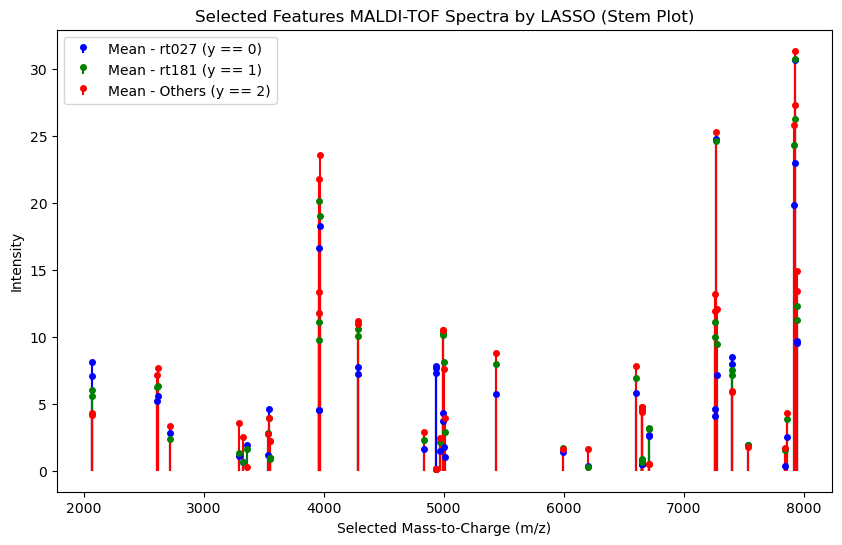

In [21]:
def plot_selected_maldi_tofs_stem(x_masses, x_intensities, y_labels, selected_features):
    """
    Plots mean±std MALDI-TOF spectra for different labels on the same figure,
    using a stem plot for selected features.

    Parameters:
    x_masses (numpy.ndarray): Array of mass-to-charge ratios.
    x_intensities (numpy.ndarray): Array of intensity values.
    y_labels (numpy.ndarray): Array of labels.
    selected_features (list or array): Indices of selected features.
    """
    plt.figure(figsize=(10, 6))

    # Function to plot mean ± std spectrum using stem plot
    def plot_mean_std_spectrum_stem(label, label_value, color, label_name):
        indices = np.where(y_labels == label_value)[0]
        selected_intensities = x_intensities[indices][:, selected_features]
        mean_spectrum = np.mean(selected_intensities, axis=0)
        std_spectrum = np.std(selected_intensities, axis=0)
        selected_masses = x_masses[selected_features]

        markerline, stemlines, baseline = plt.stem(
            selected_masses,
            mean_spectrum,
            label=f"Mean - {label_name}",
            linefmt=color,
            basefmt=" ",
        )
        plt.setp(stemlines, "color", color, "linewidth", 1.5)
        plt.setp(markerline, "color", color, "markersize", 4)

    # Plotting mean ± std spectra for each label
    plot_mean_std_spectrum_stem(y_labels, 0, "blue", "rt027 (y == 0)")
    plot_mean_std_spectrum_stem(y_labels, 1, "green", "rt181 (y == 1)")
    plot_mean_std_spectrum_stem(y_labels, 2, "red", "Others (y == 2)")

    plt.title("Selected Features MALDI-TOF Spectra by LASSO (Stem Plot)")
    plt.xlabel("Selected Mass-to-Charge (m/z)")
    plt.ylabel("Intensity")
    plt.legend()
    plt.show()


# Call the function with the data and selected features
plot_selected_maldi_tofs_stem(
    x_train_masses[0], x_train, y_train, selected_features_lasso
)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

# Training the logistic regression model using only selected features
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train[:, selected_features_lasso], y_train)

# Predicting on the test set
y_pred = model.predict(x_test[:, selected_features_lasso])

# Calculating Balanced Accuracy Score
score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {score}")



Balanced Accuracy Score: 0.9944812362030905



## HSIC-LASSO (Hilbert-Schmidt Independence Criterion LASSO)

### Overview

HSIC-LASSO is a non-linear feature selection method that combines the Hilbert-Schmidt Independence Criterion (HSIC) with the LASSO model. It is designed to capture non-linear dependencies between features and the target variable, a capability that traditional LASSO lacks.

### How HSIC-LASSO Works

HSIC measures the independence of variables in a Reproducing Kernel Hilbert Space (RKHS), allowing HSIC-LASSO to select features based on their non-linear relationship with the output. This method first maps the features and the output to a high-dimensional feature space (via kernel functions) and then applies LASSO to perform feature selection in that space.

### Applications

HSIC-LASSO is particularly valuable in complex datasets where non-linear relationships are prevalent. It has been successfully applied in genomics, image processing, and other areas where capturing non-linear interactions between variables is essential for understanding underlying patterns.


In [23]:
pip install pyHSICLasso

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 7.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=8d34d61b2382885256ba6357f8e888f56540fc09f20997e108b0f5fd629d00bb
  Stored in directory: /home/aguerrero@gaps_domain.ssr.upm.es/.cache/pip/wheels/5e/a9/47/f118e66afd12240e4662752cc22cefae5d97275623aa8ef57d
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [24]:
from pyHSICLasso import HSICLasso

# Instantiate HSICLasso
hsic_lasso = HSICLasso()

# Fit the model (n_jobs=-1 uses all CPU cores)
hsic_lasso.input(
    x_train,
    y_train,
    featname=["mass_" + str(i) for i in range(x_train.shape[1])],
)
hsic_lasso.regression(num_feat=200, B=0, n_jobs=-1)  # Adjust num_feat as needed

# Print selected features
print("Selected features by HSIC-LASSO:", hsic_lasso.get_index())

Block HSIC Lasso B = 1469.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Selected features by HSIC-LASSO: [5462, 7877, 5458, 7880, 5459, 7953, 7957, 2765, 7952, 2768, 2820, 2825, 2822, 5460, 7954, 5457, 7879, 2769, 7958, 5465, 7258, 2773, 2819, 3173, 2766, 7260, 3174, 5461, 2814, 7785, 4070, 2761, 2774, 8140, 4076, 13268, 12588, 5626, 2824, 5767, 4078, 5634, 4064, 5764, 11854, 7261, 11853, 1638, 12584, 1644, 1509, 12246, 5148, 12535, 2762, 4077, 5164, 9994, 4521, 9979, 11006, 12218, 13263, 12617, 13328, 7257, 4065, 7333, 12482, 11699, 7044, 13575, 5149, 10939]


Balanced Accuracy Score: 0.9933774834437087


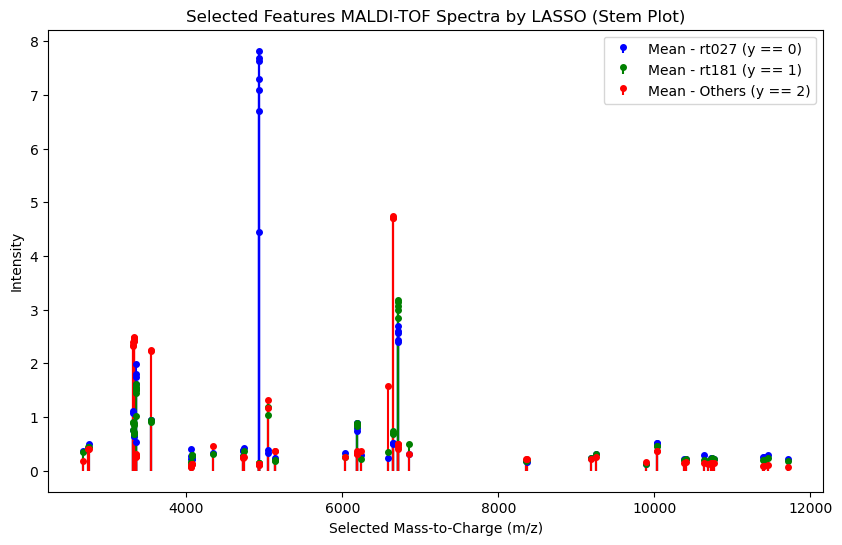

In [27]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train[:, hsic_lasso.get_index()], y_train)

# Predicting on the test set
y_pred = model.predict(x_test[:, hsic_lasso.get_index()])

# Calculating Balanced Accuracy Score
score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {score}")

# Call the function with the data and selected features
plot_selected_maldi_tofs_stem(
    x_train_masses[0], x_train, y_train, hsic_lasso.get_index()
)

# Minimum Redundancy Maximum Relevance (mRMR) Feature Selection

## What is mRMR?

The **Minimum Redundancy Maximum Relevance (mRMR)** method is a feature selection technique used in the field of machine learning. This method aims to select features that are both highly relevant to the prediction target and minimally redundant among themselves. 

## How does mRMR Work?

mRMR operates on two main principles:

- **Maximum Relevance**: This involves selecting features that have the highest relevance to the target variable. The relevance is typically measured using statistical methods like mutual information, correlation, etc. By maximizing relevance, mRMR ensures that the chosen features have strong predictive power.

- **Minimum Redundancy**: This principle ensures that the selected features are not just individually informative but also provide unique information that is not already captured by other selected features. This is achieved by minimizing the redundancy or similarity between the features. 

## Benefits of mRMR

- **Reduced Overfitting**: By eliminating redundant features, mRMR helps in building models that generalize better on unseen data.

- **Improved Model Performance**: Selecting the most relevant features often leads to enhanced performance of machine learning models.

- **Faster Training Times**: Fewer features mean reduced computational complexity, leading to faster training times.

- **Enhanced Interpretability**: A smaller set of important features makes the model easier to interpret and understand.

## Applications

mRMR is widely used in various domains, especially in scenarios where the datasets have a large number of features, such as genomics, image processing, and text analysis.



In [15]:
!pip install numpy Cython
!pip install -U pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.8 MB/s eta 0:00:00a 0:00:01
  Using cached pymrmr-0.1.11.tar.gz (69 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=115580 sha256=7be25dae7351c12e5f9aeb18ac0e25ca3a7ac2981722a10f6f9b9fd91600c30e
  Stored in directory: /home/aguerrero@gaps_domain.ssr.upm.es/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


## Usage

As they explain in their repo https://github.com/fbrundu/pymrmr/tree/master, the usage is the following:


pymRMR provides the single entry point method pymrmr.mRMR().

Data should be provided already discretised, as defined in the original paper [1]. This version of the algorithm does NOT provide discretisation, differently from the original C code.

This method requires 3 input parameters:

First parameter is a pandas DataFrame (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) containing the input dataset, discretised as defined in the original paper (for ref. see http://home.penglab.com/proj/mRMR/). The rows of the dataset are the different samples. The first column is the classification (target) variable for each sample. The remaining columns are the different variables (features) which may be selected by the algorithm. (see "Sample Data Sets" at http://home.penglab.com/proj/mRMR/ to download sample dataset to test this algorithm). IMPORTANT: the column names (feature names) should be of type string;
Second parameter is a string which defines the internal Feature Selection method to use (defined in the original paper): possible values are "MIQ" or "MID";
Third parameter is an integer which defines the number of features that should be selected by the algorithm.

In [ ]:
import pymrmr
import pandas as pd

# Assuming 'x_train' is your feature set, 'y_train' is your target variable
# and 'masses' is an array or list of mass values corresponding to each column in x_train
df0 = pd.DataFrame(y_train, columns=["target"])  # Rename the column to 'target'
df1 = pd.DataFrame(x_train)

# Concatenate the DataFrames
df = pd.concat([df0, df1], axis=1)

# Rename columns based on mass values
mass_column_names = ["mass_" + str(mass) for mass in range(x_train.shape[1])]
df.columns = ["target"] + mass_column_names

# Selecting features using mRMR
n_features = 200  # Adjust this number based on your requirement
selected_features = pymrmr.mRMR(df, "MIQ", n_features)

print("Selected features using mRMR:", selected_features)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train[:, selected_features], y_train)

# Predicting on the test set
y_pred = model.predict(x_test[:, selected_features])

# Calculating Balanced Accuracy Score
score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {score}")

# Call the function with the data and selected features
plot_selected_maldi_tofs_stem(x_train_masses[0], x_train, y_train, selected_features)

# Feature Extraction Methods for MALDI-TOF Analysis

Feature extraction is a crucial step in analyzing MALDI-TOF data, as it involves reducing the high dimensionality of the data while preserving its most informative aspects. Here are some common feature extraction methods that can be particularly effective:

## 1. Principal Component Analysis (PCA)

- **Overview**: PCA is a statistical technique that transforms the data into a new coordinate system, with the greatest variance by any projection of the data lying on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
- **Usefulness in MALDI-TOF**: PCA can reduce the dimensionality of MALDI-TOF spectra data, helping to highlight variations and patterns that might not be noticeable in the high-dimensional space.




In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Applying PCA
# You can adjust n_components based on your requirement or use a variance threshold
pca = PCA(n_components=0.95)  # Retain 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print(f"Original number of features: {x_train.shape[1]}")
print(f"Reduced number of features after PCA: {x_train_pca.shape[1]}")

# Training Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(x_train_pca, y_train)

# Predicting on the test set
y_pred = lr.predict(x_test_pca)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Original number of features: 18000
Reduced number of features after PCA: 30
Accuracy of Logistic Regression model: 0.98
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       0.94      1.00      0.97        51
           2       1.00      0.98      0.99       302

    accuracy                           0.98       392
   macro avg       0.96      0.99      0.97       392
weighted avg       0.99      0.98      0.98       392



c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

- **Overview**: t-SNE is a non-linear technique primarily used for data exploration and visualizing high-dimensional data in low-dimensional spaces (like 2D or 3D).
- **Usefulness in MALDI-TOF**: In MALDI-TOF data, t-SNE can be used to visualize the data in two or three dimensions, revealing inherent structures such as clusters or outliers.




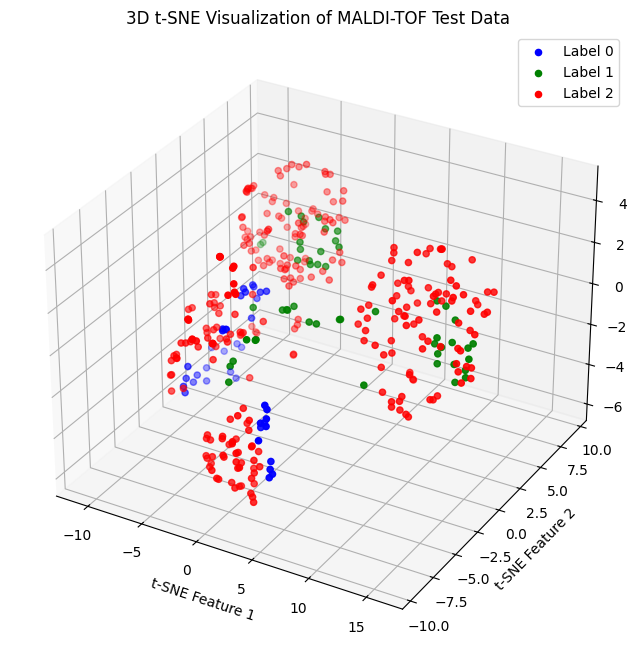

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Applying t-SNE to reduce dimensions to 3
tsne = TSNE(n_components=3, random_state=0)
x_test_tsne = tsne.fit_transform(x_test)  # Assuming x_test_scaled is your standardized test data

# Plotting the result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Colors for each label
colors = ["blue", "green", "red"]  # Adjust or expand as needed for the number of labels

for label, color in zip(np.unique(y_test), colors):
    ax.scatter(
        x_test_tsne[y_test == label, 0],
        x_test_tsne[y_test == label, 1],
        x_test_tsne[y_test == label, 2],
        c=color,
        label=f"Label {label}",
    )

ax.set_xlabel("t-SNE Feature 1")
ax.set_ylabel("t-SNE Feature 2")
ax.set_zlabel("t-SNE Feature 3")
ax.legend()
plt.title("3D t-SNE Visualization of MALDI-TOF Test Data")
plt.show()